# Ox Bank Marketing Campaign 

In [29]:
def evaluate(estimator, X_tr, X_h_te, y_tr, y_h_te):
    '''
    This is to evalute the best models and outputs are the metrics and matrix
    estimator: model,
    X_tr: X_train,
    X_h_te: X_hold_test,
    y_tr: y_training set,
    y_h_te: y_hold_test
    '''
#    predicts the models
    tr_preds = estimator.predict(X_tr)
    te_h_preds = estimator.predict(X_h_te)
    
    print("Training Scores:")
    print(f"Train Accuracy: {accuracy_score(y_tr, tr_preds)}")
    print(f"Train precision: {precision_score(y_tr, tr_preds)}")
    print(f"Train recall: {recall_score(y_tr, tr_preds)}")
    print("*" * 10)
    print("Hold Out Scores:")
    print(f"Test Accuracy: {accuracy_score(y_h_te, te_h_preds)}")
    print(f"Test precision: {precision_score(y_h_te, te_h_preds)}")
    print(f"Test recall: {recall_score(y_h_te, te_h_preds)}")
    
#     creates a report of all the scores in test set
    print(classification_report(y_h_te, te_h_preds))
    
    
    # Plot confusion matrix for test set
    plot_confusion_matrix(estimator, X_h_te, y_h_te)

## Overview

This project focuses on OX bank that conducted a marketing campaign by phone calls, to increase the number of term deposits. A term deposit is a fixed term investment at a bank. Term deposits usually have shot term maturities ranging from one month to a few years. They also require varying levels of minimum deposits. The marketing divison havs asked the data science divison of OX bank to analyze their data from the previous campaign. The data science team decides to build a few machine learning models to give the marketing team some key predictions for the next campaign. 






## Business Problem

We are in the data science division of bank and are working with the marketing team to see how they can conduct the campaign to get better results. To do this we performed various machine learning models to try to predict what features the marketing team should focus the campaign on. The stakeholders of this business problem are the bank executives and members of the marketing team. Marketing campaigns can be costly and it is important to have solid data and predictions before hand to plan it correctly. A bank needs customers and a good marketing campaign can directly correlate to raising the number of clients doing business with OX. Even if does not directly lead to a client signing deposit it can help get leads for the future.

The deliverable for this project would be the analysis of the data through the use of a machine learning model. We are not delivering the model as the stakeholders are more focoused on results so they can translate it into a campaign. That being stated we will keep our models transparent as we are dealing with senstive banking data. 

It will be important to avoid false postives in our model. This means that we will predict the customer will sign a deposit when in reality they will not. This woudl be much worse for OX bank as a false negative would mean the client would still sign a deposit with the bank which is the overall goal of the campaign. The metric we are focused on optimizing would be precision. Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. A higher precision means there is less chance of false positives which we want to avoid. 






## Data Understanding


- The data is from the UCI Bank marketing datasets. It represents the information of the client called and the information of the campaign
- The target variable is column y - has the client subscribed a term deposit?
- We intend to use all the variables 
-  The was data was complete and had no missing values for each column. It contains categorical variables and numeric. 

## Data Preparation

The indepth explanation of the data analysis is inside the notebook file, named (Data_analysis
and feature_engineering). 
- Through the data analysis, we understood the avarage age of the clients and how much they have in their accounts.
- The columns dropped, was the:
    * pdays (i.e number of days  passed by after the client was last contacted)
    * Default (huge proportion of no client has credit in default)
    * Previous (just focusing on this datasets not from other campaign)
    
- The pipeline created was used for all the models

## Modeling

- After the analysis, created a new csv file for the edited data.
- Using different parameters and taking the best ones to test on the holdout set for good precision
- The random forest was most appropiate because it has the highest number or accuracy and precision.

## Evaluation

The evaluation of each model should accompany the creation of each model, and you should be sure to evaluate your models consistently.

- The model was interpreted by using the precision score 
- how many times the model predicts the client is going to make a deposit actually makes a deposit

- We need to consider that the data is imbalanced which should be, because not all of our client will make a term deposit 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score, plot_confusion_matrix, plot_roc_curve

### Baseline Understanding

- What does a baseline, model-less prediction look like?

In [7]:
!ls data

bank-full.csv  bank-names.txt bank.csv


In [16]:
bank_df = pd.read_csv('data/bank-full.csv', sep=';')

In [17]:
bank_df['y'].value_counts(normalize=True)

no     0.883015
yes    0.116985
Name: y, dtype: float64

### First $&(@# Model

Before going too far down the data preparation rabbit hole, be sure to check your work against a first 'substandard' model! What is the easiest way for you to find out how hard your problem is?

In [21]:
!ls Notebook/Michael

KNN_Models.ipynb
Modelling.ipynb
Models.ipynb
Project3Template.ipynb
bank Analysis and feature engineering.ipynb
eddited_bank.csv


In [25]:
edited_df = pd.read_csv('Notebook/Michael/eddited_bank.csv', sep=';')
edited_df['y'] = edited_df['y'].replace(to_replace=['no', 'yes'], value=[0, 1])
X = edited_df.drop('y', axis=1)
y = edited_df['y']
X_train, X_hold, y_train, y_hold = train_test_split(X, y, test_size=0.1, random_state=42)

cat_col = []
num_col = []

for col in edited_df.columns:
    if edited_df[col].dtype == 'object':
        cat_col.append(col)
    else:
        if col != 'y':
            num_col.append(col)

# for transforming the numerical and categorical variables

num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('ohe', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_col),
    ('cat', cat_transformer, cat_col)
])
classfier = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logisticregression', LogisticRegression(random_state=42))
])

# cross validating the training data 
output = cross_validate(classfier, X_train, y_train, cv=6, scoring='accuracy')
print(output['test_score'])

/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mac/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modul

[0.90224123 0.89943969 0.90224123 0.90045716 0.90311164 0.90399646]


### Modeling Iterations

Now you can start to use the results of your first model to iterate - there are many options!

In [26]:
# splitting the trainning data again to find the best possible model without using the test data
X_trained, X_test, y_trained, y_test = train_test_split(X_train, y_train, test_size=0.33, random_state=42)

In this section there were tens of model, that took hours to load 

### 'Final' Model

In the end we arrived the random forest model with the best parameters.
refer to other models inside the notebook.

In [27]:
# code here to show your final model
from sklearn.ensemble import RandomForestClassifier

knn_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rfc', RandomForestClassifier(random_state=42))
])
# grid searh to choose the best (combination of) hyperparameters
params_forest_model ={'rfc__n_estimators': [100,200,400],'rfc__max_depth': [20,40,50,60]}

gs_rand_forest=GridSearchCV(estimator= knn_model,
               param_grid= params_forest_model,
               cv=5)

gs_rand_forest.fit(X_trained, y_trained)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['age',
                                                                          'balance',
                                                                          'day',
                                                                          'duration',
                                                                          'campaign']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('ohe',
                                    

Training Scores:
Train Accuracy: 0.9669443830027772
Train precision: 0.9302030456852792
Train recall: 0.7740232312565998
**********
Hold Out Scores:
Test Accuracy: 0.9013710747456878
Test precision: 0.6812080536912751
Test recall: 0.3664259927797834
              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3968
           1       0.68      0.37      0.48       554

    accuracy                           0.90      4522
   macro avg       0.80      0.67      0.71      4522
weighted avg       0.89      0.90      0.89      4522



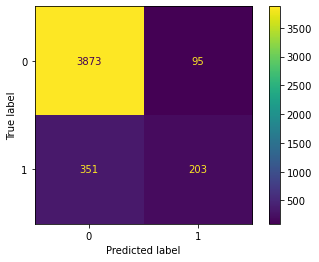

In [30]:
# code here to evaluate your final model
evaluate(gs_rand_forest.best_estimator_, X_train, X_hold, y_train, y_hold)

## Conclusions


#### What would you recommend the business do as a result of this work?

We recommend to focus on the 3 W for the next campaign:

* When: Duration-  Summer Months
* Who: Education - Tertiary and Secondary 
        * Age (plan for retirement)
* Where: Jobs - Management, Technician,  Self-employed


#### How could the stakeholder use your model effectively?

The manager could use the model for finding the features to improve on for the next campaign

In [31]:
importances = gs_rand_forest.best_estimator_.named_steps['rfc'].feature_importances_
# the transformed columns of numerical variables
num_cols = gs_rand_forest.best_estimator_['preprocessor'].transformers_[0][2]
# transformed columns in the encoded variable
feature_name_importance = gs_rand_forest.best_estimator_['preprocessor'].transformers_[1][1]['ohe'].get_feature_names(cat_col)
# creating a list of all the columns 
# note: * is for unpacking the lists
final_cols = [*num_cols, *feature_name_importance]

<AxesSubplot:>

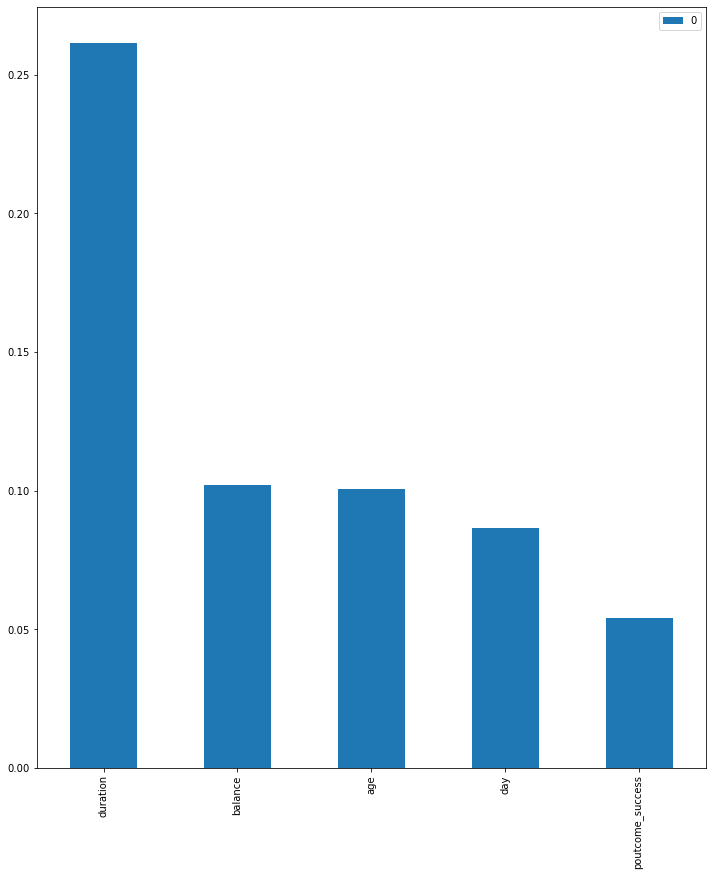

In [36]:
# putting together the one hot encoder columns and feature importance into a dataframe
# called feature importance dataframe

feature_impor_df = pd.DataFrame.from_dict(dict(zip(final_cols, importances)),
                            orient='index').sort_values(by=0, ascending=False)
# feature_impor_df[0]
feature_impor_df.head().plot(kind='bar', figsize=(12,14))

#### What are some reasons why your analysis might not fully solve the business problem?

- This analysis does not account for changing technological advancement
- More data features 


#### What else could you do in the future to improve this project (future work)?

- We can improve in model optimization
- questionnaire during the campaign